In [1]:
import os
import cv2
import numpy as np

def preprocess_data(data_dir):
    X = []  # List to store preprocessed images
    y = []  # List to store labels (cats or dogs)

    # Iterate through the directories (cats and dogs)
    for label in os.listdir(data_dir):
        # Iterate through the image files in each directory
        for image_file in os.listdir(os.path.join(data_dir, label)):
            image_path = os.path.join(data_dir, label, image_file)
            # Read the image
            image = cv2.imread(image_path)
            # Convert the image to grayscale
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Resize the image to a uniform size (e.g., 100x100 pixels)
            image = cv2.resize(image, (100, 100))
            # Flatten the pixel values of the image and append to X
            X.append(image.flatten())
            # Append the label (cat or dog) to y
            y.append(label)

    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y


In [2]:
data_dir = "C:/Users/varun/Downloads/archive/dogs_vs_cats"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

X_train, y_train = preprocess_data(train_dir)
X_test, y_test = preprocess_data(test_dir)


In [9]:
print("Before calling preprocess_data()")
X_train, y_train = preprocess_data(train_dir)
print("After calling preprocess_data()")


Before calling preprocess_data()
Label: cats
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.0.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.1.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.100.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.1000.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10002.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10003.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10004.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10005.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10006.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10008.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_cats\train\cats\cat.10009.jpg
Image path: C:/Users/varun/Downloads/archive/dogs_vs_

In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

# Ensure that the save directory exists; if not, create it
os.makedirs(save_dir, exist_ok=True)

def augment_data(data_dir, save_dir, augment_factor=2):
    # Create ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Load cat images from the training directory
    cat_images = [os.path.join(data_dir, 'cats', filename) for filename in os.listdir(os.path.join(data_dir, 'cats'))]
    
    # Augment the images and save them to the specified directory
    for img_path in cat_images:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, axis=0)
        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=save_dir, save_prefix='cat', save_format='jpeg'):
            i += 1
            if i >= augment_factor:
                break  # Break loop after generating desired number of augmented images

# Define paths
train_dir = "C:/Users/varun/Downloads/archive/dogs_vs_cats/train"
save_dir = "C:/Users/varun/Downloads/archive/dogs_vs_cats/augmented_train"

# Augment the training data
augment_data(train_dir, save_dir)


In [13]:
def load_augmented_data(data_dir, target_size=(100, 100)):
    X = []
    y = []
    for filename in os.listdir(data_dir):
        if filename.startswith('cat'):  # Check if the filename starts with 'cat'
            img_path = os.path.join(data_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (if needed)
            img = cv2.resize(img, target_size)  # Resize the image to the target size
            X.append(img)
            y.append('cats')  # Label is 'cats' for augmented cat images
    return np.array(X), np.array(y)


In [14]:
# Load augmented data
X_augmented, y_augmented = load_augmented_data(save_dir)


In [15]:
print("Shape of augmented images array:", X_augmented.shape)
print("Shape of labels array:", y_augmented.shape)


Shape of augmented images array: (7395, 100, 100, 3)
Shape of labels array: (7395,)


In [21]:
import cv2
import os

def preprocess_data(data_dir):
    X = []
    y = []
    
    # Iterate through the image files in the 'cats' directory
    for image_file in os.listdir(data_dir):
        # Check if the file is an image (ends with .jpg or .jpeg)
        if image_file.lower().endswith(('.jpg', '.jpeg')):
            # Load the image
            image_path = os.path.join(data_dir, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            X.append(img)
            y.append('cats')  # Label is 'cats' for cat images
    
    return np.array(X), np.array(y)


Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.0.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.1.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.100.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.1000.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10002.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10003.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10004.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10005.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10006.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10008.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10009.jpg
Processing image: C:/Users/varun

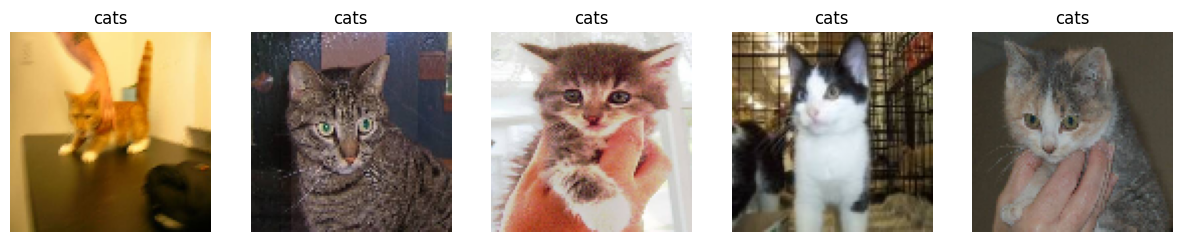

In [29]:
# Define the directory path
cats_train_dir = os.path.join(train_dir, 'cats')

# Load original training data (cat images)
X_original, y_original = preprocess_data(cats_train_dir)

# Display a few samples from the original training data
show_images(X_original, y_original)


Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.0.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.1.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.100.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.1000.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10002.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10003.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10004.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10005.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10006.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10008.jpg
Processing image: C:/Users/varun/Downloads/archive/dogs_vs_cats/train\cats\cat.10009.jpg
Processing image: C:/Users/varun

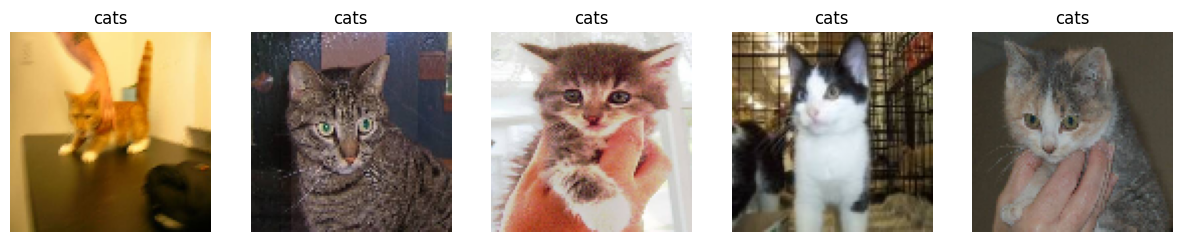

Images displayed successfully.


In [31]:
# Load original training data (cat images)
X_original, y_original = preprocess_data(cats_train_dir)

# Verify if images and labels are loaded
print("Shape of X_original:", X_original.shape)
print("Shape of y_original:", y_original.shape)

# Display a few samples from the original training data
show_images(X_original, y_original)
print("Images displayed successfully.")


In [2]:
import matplotlib.pyplot as plt

def show_cats(images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()


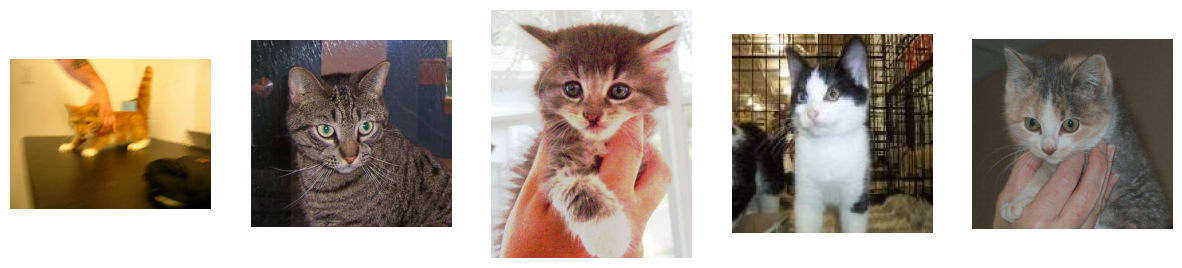

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory containing cat images
cats_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats"

# Get a list of all image files in the directory
cat_image_files = [file for file in os.listdir(cats_dir) if file.endswith('.jpg')]

# Display a few samples of cat images
num_images_to_display = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    image_path = os.path.join(cats_dir, cat_image_files[i])
    img = Image.open(image_path)
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [8]:
import os
import numpy as np
from PIL import Image

# Directory containing cat images
cats_dir = 'C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats'

# Function to load and preprocess images from the directory
def load_images_from_directory(directory, target_size=(100, 100)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize(target_size)
            # Convert the image to a NumPy array and normalize pixel values
            image_array = np.array(image) / 255.0
            images.append(image_array)
    return np.array(images)

# Load cat images
cat_images = load_images_from_directory(cats_dir)

# Display the number of images loaded
print("Number of cat images:", len(cat_images))


Number of cat images: 6736


In [9]:
# Assign label 1 to all cat images
labels = np.ones(len(cat_images), dtype=int)


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(cat_images, labels, test_size=0.2, random_state=42)

# Display the number of samples in each set
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))


Number of training samples: 5388
Number of validation samples: 1348


In [17]:
import os
import numpy as np
from PIL import Image

# Function to load and resize images from a directory
def load_and_resize_images_from_directory(directory, target_size):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            # Load and resize the image
            image = Image.open(image_path)
            image = image.resize(target_size)
            # Convert the image to numpy array
            image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
            images.append(image_array)
    return images

# Define the target size for resizing the images
target_size = (150, 150)

# Directory containing original training images
original_train_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats"
# Directory containing augmented images
augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\augmented_train"

# Load and resize original training images
X_train_original = load_and_resize_images_from_directory(original_train_dir, target_size)
# Convert original images to numpy array
X_train_original = np.array(X_train_original)

# Load and resize augmented images, ensuring they have the same dimensions as original images
X_train_augmented = load_and_resize_images_from_directory(augmented_dir, X_train_original[0].shape[:2])
# Convert augmented images to numpy array
X_train_augmented = np.array(X_train_augmented)

# Check the shapes of the arrays
print("Shape of original images array:", X_train_original.shape)
print("Shape of augmented images array:", X_train_augmented.shape)


Shape of original images array: (6736, 150, 150, 3)
Shape of augmented images array: (0,)


In [2]:
import os
import numpy as np
from PIL import Image

# Function to load and resize images from a directory
def load_and_resize_images_from_directory(directory, target_size):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            # Load and resize the image
            image = Image.open(image_path)
            image = image.resize(target_size)
            # Convert the image to numpy array
            image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
            images.append(image_array)
    return images

# Define the target size for resizing the images
target_size = (150, 150)

# Directory containing original training images
original_train_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats"
# Directory containing augmented images
augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\augmented_train"

# Load and resize original training images
X_train_original = load_and_resize_images_from_directory(original_train_dir, target_size)
# Convert original images to numpy array
X_train_original = np.array(X_train_original)

# Load and resize augmented images, ensuring they have the same dimensions as original images
X_train_augmented = load_and_resize_images_from_directory(augmented_dir, target_size)
# Convert augmented images to numpy array
X_train_augmented = np.array(X_train_augmented)

# Check the shapes of the arrays
print("Shape of original images array:", X_train_original.shape)
print("Shape of augmented images array:", X_train_augmented.shape)


Shape of original images array: (6736, 150, 150, 3)
Shape of augmented images array: (0,)


In [6]:
import os
import shutil
import random

# Define the directory containing original training images
original_train_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats"

# Directory to create a new augmented folder
augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\new_augmented_train"

# Create the augmented directory if it doesn't exist
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Define the number of images to be copied for augmentation
num_images_to_copy = 1000

# Copy random images from the original directory to the augmented directory
filenames = os.listdir(original_train_dir)
random.shuffle(filenames)
for i in range(num_images_to_copy):
    filename = filenames[i]
    shutil.copy(os.path.join(original_train_dir, filename), augmented_dir)

print("New augmented folder created at:", augmented_dir)


New augmented folder created at: C:\Users\varun\Downloads\archive\dogs_vs_cats\new_augmented_train


In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.1,  # Fraction of total width for horizontal shift
    height_shift_range=0.1, # Fraction of total height for vertical shift
    shear_range=0.2,        # Shear angle in counter-clockwise direction
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=False,    # Disable vertical flipping
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)


In [12]:
# Path to the new augmented folder
new_augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\new_augmented_train"

# Number of augmented images to generate per original image
augment_factor = 5

# Iterate through each original image and generate augmented images
for i, img in enumerate(X_train_original):
    # Reshape the image to (1, height, width, channels)
    img = img.reshape((1,) + img.shape)
    
    # Generate augmented images and save them to the new augmented folder
    j = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=new_augmented_dir, save_prefix='cat', save_format='jpg'):
        j += 1
        if j >= augment_factor:
            break  # Break the loop after generating the desired number of augmented images


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing the augmented images
new_augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\new_augmented_train"

# ImageDataGenerator configuration for loading images
datagen = ImageDataGenerator(rescale=1./255)

# Load and configure data generator for the augmented images
augmented_generator = datagen.flow_from_directory(
    new_augmented_dir,
    target_size=target_size,  # specify the target size for resizing the images
    batch_size=batch_size,    # specify the batch size for loading images
    class_mode='binary',      # specify the class mode
    shuffle=True              # shuffle the data
)

# Verify if the images are loaded correctly
print("Found", augmented_generator.samples, "images belonging to", augmented_generator.num_classes, "classes.")


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [16]:

import os

# Directory paths
original_train_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats"
new_augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\new_augmented_train"

# Function to list files in a directory
def list_files(directory):
    files = os.listdir(directory)
    print("Files in directory:", directory)
    for file in files:
        print(file)

# List files in original training directory
list_files(original_train_dir)
print()

# List files in new augmented directory
list_files(new_augmented_dir)


Files in directory: C:\Users\varun\Downloads\archive\dogs_vs_cats\train\cats
cat.0.jpg
cat.1.jpg
cat.100.jpg
cat.1000.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10008.jpg
cat.10009.jpg
cat.1001.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10016.jpg
cat.10018.jpg
cat.10019.jpg
cat.1002.jpg
cat.10020.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1003.jpg
cat.10031.jpg
cat.10032.jpg
cat.10034.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1004.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10047.jpg
cat.10049.jpg
cat.1005.jpg
cat.10050.jpg
cat.10051.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10058.jpg
cat.10059.jpg
cat.1006.jpg
cat.10060.jpg
cat.10061.jpg
cat.10062.jpg
cat.10063.jpg
cat.10065.jpg
cat.10066.jpg
cat.10067.jpg
cat.10068.jpg
cat.10069.jpg
cat.1007.jpg
cat.10070.jpg
cat

In [18]:
import os
import numpy as np
from PIL import Image

# Function to load and preprocess images from a directory in batches
def load_and_preprocess_images_in_batches(directory, target_size, batch_size):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            # Load the image
            image = Image.open(image_path)
            # Resize the image
            image = image.resize(target_size)
            # Convert the image to numpy array and normalize
            image_array = np.array(image) / 255.0
            images.append(image_array)
            # If the batch size is reached, yield the batch
            if len(images) == batch_size:
                yield np.array(images)
                images = []
    # Yield the remaining images as the last batch
    if images:
        yield np.array(images)

# Target size for resizing the images
target_size = (150, 150)

# Batch size for loading images
batch_size = 128

# Load and preprocess original training images in batches
X_original_batches = load_and_preprocess_images_in_batches(original_train_dir, target_size, batch_size)

# Check the shape of the first batch of original images
batch = next(X_original_batches)
print("Shape of original images batch:", batch.shape)


Shape of original images batch: (128, 150, 150, 3)


In [19]:
# Function to load and preprocess augmented images from a directory in batches
def load_and_preprocess_augmented_images_in_batches(directory, target_size, batch_size):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            # Load the image
            image = Image.open(image_path)
            # Resize the image
            image = image.resize(target_size)
            # Convert the image to numpy array and normalize
            image_array = np.array(image) / 255.0
            images.append(image_array)
            # If the batch size is reached, yield the batch
            if len(images) == batch_size:
                yield np.array(images)
                images = []
    # Yield the remaining images as the last batch
    if images:
        yield np.array(images)

# Load and preprocess augmented images in batches
X_augmented_batches = load_and_preprocess_augmented_images_in_batches(new_augmented_dir, target_size, batch_size)

# Check the shape of the first batch of augmented images
batch = next(X_augmented_batches)
print("Shape of augmented images batch:", batch.shape)


Shape of augmented images batch: (128, 150, 150, 3)


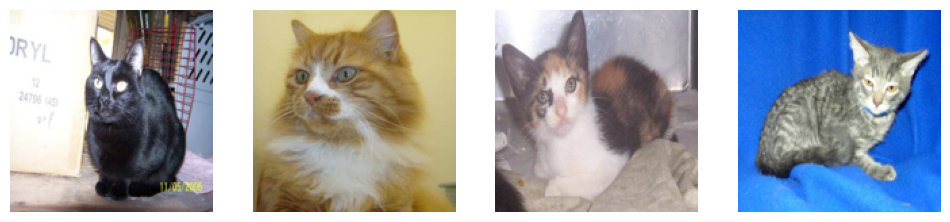

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and preprocess augmented images from a directory in batches
def load_and_preprocess_augmented_images_in_batches(directory, target_size, batch_size):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            # Load the image
            image = Image.open(image_path)
            # Resize the image
            image = image.resize(target_size)
            # Convert the image to numpy array and normalize
            image_array = np.array(image) / 255.0
            images.append(image_array)
            # If the batch size is reached, yield the batch
            if len(images) == batch_size:
                yield np.array(images)
                images = []
    # Yield the remaining images as the last batch
    if images:
        yield np.array(images)

# Function to display images from a batch
def show_images(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()

# Path to the new augmented folder
new_augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\new_augmented_train"
target_size = (150, 150)
batch_size = 128

# Load and preprocess augmented images in batches
X_augmented_batches = load_and_preprocess_augmented_images_in_batches(new_augmented_dir, target_size, batch_size)

# Show a few images from the batch
batch = next(X_augmented_batches)
show_images(batch[:4], rows=1, cols=4)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            # Load the image and preprocess
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
            image = tf.keras.preprocessing.image.img_to_array(image) / 255.0
            images.append(image)
    return images

# Directory containing original training images
original_train_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\train\\cats"
# Directory containing new augmented images
new_augmented_dir = "C:\\Users\\varun\\Downloads\\archive\\dogs_vs_cats\\new_augmented_train"

# Load original and augmented images
original_images = load_images_from_directory(original_train_dir)
augmented_images = load_images_from_directory(new_augmented_dir)

# Combine original and augmented images
X = np.concatenate([original_images, augmented_images])
y = np.concatenate([np.zeros(len(original_images)), np.ones(len(augmented_images))])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
